# Python APIs Challenge

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

629


## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

#create empty list to house data for data frame
weather_data=[]

#create counter to list number of city being processed
counter=1

#create for-loop to add cities to the url in order to pull the relevant json data
for city in cities:
    city_url=requests.get(url+'&q='+city)
    
    #print the city name along with the counter and format city name to Title case
    print(f"\nCity {counter}: {city.title()} is being processed. \n--------------------------")
    counter=counter+1
    
    #Create values for dataframe creation within a try-loop to exclude cities with missing data
    try:
        city_data=city_url.json()
        name=city_data["name"]
        lat=city_data["coord"]['lat']
        max_temp=city_data["main"]["temp_max"]
        humidity=city_data["main"]["humidity"]
        wind=city_data["wind"]["speed"]
        clouds=city_data["clouds"]["all"]
        
        #Create dictionary of values and append dictionary of with relevant values to the empty list
        weather={"City":name, "Latitude":lat, "Temp":max_temp, "Humidity":humidity, "Wind Speed":wind, "Cloudiness":clouds}
        weather_data.append(weather)       

    
    except KeyError:
        pass
#When the program is done processing the information, print "done"
print("done")



City 1: Punta Arenas is being processed. 
--------------------------

City 2: Conversion is being processed. 
--------------------------

City 3: Gazanjyk is being processed. 
--------------------------

City 4: Avarua is being processed. 
--------------------------

City 5: Taolanaro is being processed. 
--------------------------

City 6: Ushuaia is being processed. 
--------------------------

City 7: Busselton is being processed. 
--------------------------

City 8: Abatskoye is being processed. 
--------------------------

City 9: Fort Nelson is being processed. 
--------------------------

City 10: Butaritari is being processed. 
--------------------------

City 11: Dandong is being processed. 
--------------------------

City 12: Upernavik is being processed. 
--------------------------

City 13: Ventanas is being processed. 
--------------------------

City 14: Kaitangata is being processed. 
--------------------------

City 15: Nizhneyansk is being processed. 
---------------

## Weather Data Frame

In [4]:
df=pd.DataFrame(weather_data)
df.to_csv("Weather_Data.csv")
df.head()

,City,Cloudiness,Humidity,Latitude,Temp,Wind Speed
0,Punta Arenas,75,75,-53.16,42.80,10.29
1,Conversion,92,98,15.90,69.59,3.06
2,Gazanjyk,0,35,39.24,63.83,4.52
3,Avarua,20,74,-21.21,80.60,8.05
4,Ushuaia,75,75,-54.81,41.00,17.22


## Graphs

### Latitude vs Max Temperature

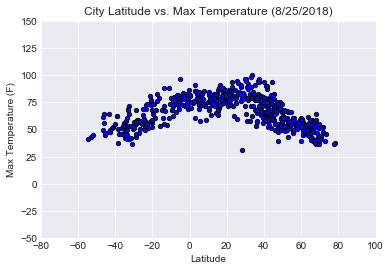

In [6]:
plt.scatter(df["Latitude"], df["Temp"], edgecolors="black", facecolors="blue", s=20, linewidth=.75)
sns.set_style("darkgrid")
plt.grid(True)
plt.title("City Latitude vs. Max Temperature (8/25/2018)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-80, 100)
plt.ylim(-50,150)
plt.savefig("Images/Latitude_vs_Temperature.png")
plt.show()

### Latitude vs Humidity

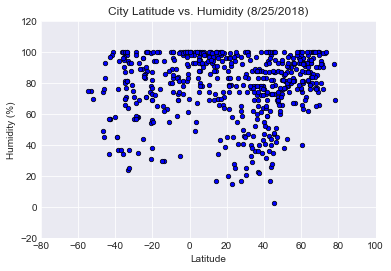

In [7]:
plt.scatter(df["Latitude"], df["Humidity"], edgecolors="black", facecolors="blue", s=20, linewidth=.75)
sns.set_style("darkgrid")
plt.grid(True)
plt.title("City Latitude vs. Humidity (8/25/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-80, 100)
plt.ylim(-20,120)
plt.savefig("Images/Latitude_vs_Humidity.png")
plt.show()

### Latitude vs Cloudiness

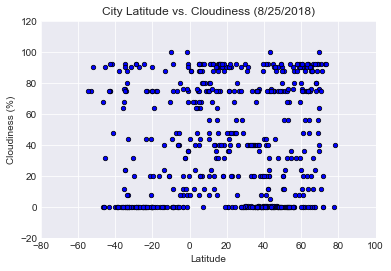

In [8]:
plt.scatter(df["Latitude"], df["Cloudiness"], edgecolors="black", facecolors="blue", s=20, linewidth=.75)
sns.set_style("darkgrid")
plt.grid(True)
plt.title("City Latitude vs. Cloudiness (8/25/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-80, 100)
plt.ylim(-20,120)
plt.savefig("Images/Latitude_vs_Cloudiness.png")
plt.show()

### Latitude vs Wind Speed

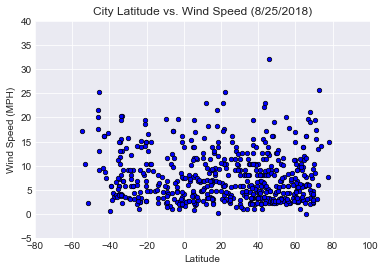

In [9]:
plt.scatter(df["Latitude"], df["Wind Speed"], edgecolors="black", facecolors="blue", s=20, linewidth=.75)
sns.set_style("darkgrid")
plt.grid(True)
plt.title("City Latitude vs. Wind Speed (8/25/2018)")
plt.xlim(-80, 100)
plt.ylim(-5,40)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.savefig("Images/Latitude_vs_WindSpeed.png")
plt.show()

# Analysis of Weather Data
* The maximum temperatures tend to increase as latitude approaches 0. This is an expected result as latitude 0 is the equator and thus the most consistently warm area on the planet.
* Cloudiness varies across all of the cities and does not appear to correlate to latitude in any meaningful way.
* Wind speed clusters between 0-15 mph for the majority of cities identified in this data set on the particular day observed with some outliers moving between 15 and 30 mph. Latitude does not appear to create any noticeable affect.